In [2]:
url_base="https://www.otomoto.pl/osobowe"

In [8]:
urls_to_scrape=[]
urls_to_scrape.append(url_base)
for i in range(2,501):
    urls_to_scrape.append(f"{url_base}?page={i}")
urls_to_scrape

['https://www.otomoto.pl/osobowe',
 'https://www.otomoto.pl/osobowe?page=2',
 'https://www.otomoto.pl/osobowe?page=3',
 'https://www.otomoto.pl/osobowe?page=4',
 'https://www.otomoto.pl/osobowe?page=5',
 'https://www.otomoto.pl/osobowe?page=6',
 'https://www.otomoto.pl/osobowe?page=7',
 'https://www.otomoto.pl/osobowe?page=8',
 'https://www.otomoto.pl/osobowe?page=9',
 'https://www.otomoto.pl/osobowe?page=10',
 'https://www.otomoto.pl/osobowe?page=11',
 'https://www.otomoto.pl/osobowe?page=12',
 'https://www.otomoto.pl/osobowe?page=13',
 'https://www.otomoto.pl/osobowe?page=14',
 'https://www.otomoto.pl/osobowe?page=15',
 'https://www.otomoto.pl/osobowe?page=16',
 'https://www.otomoto.pl/osobowe?page=17',
 'https://www.otomoto.pl/osobowe?page=18',
 'https://www.otomoto.pl/osobowe?page=19',
 'https://www.otomoto.pl/osobowe?page=20',
 'https://www.otomoto.pl/osobowe?page=21',
 'https://www.otomoto.pl/osobowe?page=22',
 'https://www.otomoto.pl/osobowe?page=23',
 'https://www.otomoto.pl/os

In [9]:
# Otwarcie pliku do zapisu (tryb 'w' oznacza zapis, istniejący plik zostanie nadpisany)
with open("url_to_scrape.txt", "w") as file:
    # Zapisanie każdego elementu listy do pliku
    for url in urls_to_scrape:
        file.write(url + "\n")

In [11]:
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url_base, headers=headers)

In [12]:
response

<Response [200]>

In [13]:
from bs4 import BeautifulSoup
# Użycie BeautifulSoup do parsowania odpowiedzi
soup = BeautifulSoup(response.text, 'html.parser')

In [34]:
articles=soup.find_all("article") # article is class of every post
articles[0].find("img").get("src")

'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6ImhxZ3duc2o1d2oxZDEtT1RPTU9UT1BMIn0.qPTrMSyj1aGOpw2iQlhPWx7iqhvLP9kkhWyin4LKFhs/image;s=320x240'

In [45]:
url_of_img_to_scrape=[]
for article in articles:
    try:
        url=article.find("img").get("src")
        if url.startswith("https://") and url.endswith("320x240"):
            url_of_img_to_scrape.append(url)
    except:
        pass
url_of_img_to_scrape

['https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6ImhxZ3duc2o1d2oxZDEtT1RPTU9UT1BMIn0.qPTrMSyj1aGOpw2iQlhPWx7iqhvLP9kkhWyin4LKFhs/image;s=320x240',
 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6Ino0NmR6bjQ1YnY3dTEtT1RPTU9UT1BMIn0.4Xd2BhF0oNzk9B_D4TJIfbuHzTofuWAkBzu2MY_MITI/image;s=320x240',
 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InBtanJjcDdjMWo5bC1PVE9NT1RPUEwifQ.qVmY3d-cxdVfKe2kQW_05i2Teb-35dw_DdenRJhliL0/image;s=320x240',
 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6Imc5cjB1emdnZ3RsbzEtT1RPTU9UT1BMIn0.w9dlkVOQoGjYzaQorfeOZVfgvEREBnpIM220kx2FRfA/image;s=320x240',
 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6ImdnYWkweDVoa3Ewbi1PVE9NT1RPUEwifQ.xn1vue2t23tN-FgPbRvN-wFkZVFsa7Ea7STEzpCuge8/image;s=320x240',
 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InF2aXo5OHB0d3AweS1PVE9NT1RPUEwifQ.scTaq1OIexxeQFwlw15gg397VJUhY_6gw0Zglt72ZA8/image;s=320x240',
 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InJkazN0MzFhaXZlaTItT1RPTU9UT1BMIn0.6fOE_GYI

In [46]:
len(url_of_img_to_scrape)

32

In [2]:
import requests
url = "https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6Im5wenp3OXhrMG9heC1PVE9NT1RPUEwifQ.Tqe917e2gTqYdlGcsdbsCAtMRuBa97RGgppQcqb8eng/image;s=320x240"

# Wykonaj zapytanie HTTP GET, aby pobrać zawartość obrazu
response = requests.get(url)

# Sprawdź, czy odpowiedź jest poprawna (kod odpowiedzi 200 oznacza sukces)
if response.status_code == 200:
    # Otwórz plik w trybie binarnym do zapisu
    with open("obraz.jpg", "wb") as file:
        # Zapisz zawartość odpowiedzi (obraz) do pliku
        file.write(response.content)
    print("Obraz został pomyślnie pobrany i zapisany jako obraz.jpg.")
else:
    print("Wystąpił problem podczas pobierania obrazu.")
response.content

Obraz został pomyślnie pobrany i zapisany jako obraz.jpg.


b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x00\xd5\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x00\x01\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01i\x1cl9\xf5\xdaG\x1f\xc6\xc3\xcc\x84\x8d.\xbb\xe6\xff\x00M\xc8p\x9c\xf4\x8ay\xac!]\x07\xd0B~\xc0\x9c\x04j\xa3zP\xf9Ddh\xf3\x8d\xdes;M\x8f\xef\xcf\xb5\xd4R5\xb1\x99\x1a\x82\xc2\xdd\x12\xef/\xe8\xee\x9dy=\xd4\xe4\x1ar\xee\xe3A\x8e\xd6u\xc4\xef\x16\xfd\xe7\xe6\x9e\xc2S\xb7\xbd\tY7~}J\xe5C2<\xbc\xe9\x81\xe1\xd8G\xa0\x9eF3\xe2\xa8\x9

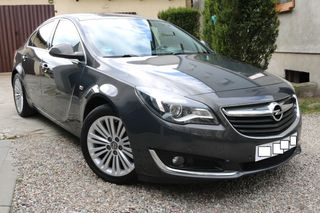

In [4]:
import urllib.request
from PIL import Image

# URL of the image you want to download
url = "https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6Im5wenp3OXhrMG9heC1PVE9NT1RPUEwifQ.Tqe917e2gTqYdlGcsdbsCAtMRuBa97RGgppQcqb8eng/image;s=320x240"


# Save the image to a file named "geeksforgeeks.png"
urllib.request.urlretrieve(url, "geeksforgeeks.png")

# Open the image and display it (optional)
img = Image.open("geeksforgeeks.png")
img.show()